In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
dataset_path = "Sample_dataset" 
output_path = "processed_data"

In [3]:
os.makedirs(output_path, exist_ok=True)

In [4]:
def load_audio(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        return y, sr
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None

In [5]:
def audio_to_spectrogram(y, n_fft=2048, hop_length=512):

    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    return S_db

In [6]:
def preprocess_audio(folder_path, output_path):
    spectrograms = []
    labels = []
    
    for music_folder in tqdm(os.listdir(folder_path), desc="Processing Dataset"):
        music_path = os.path.join(folder_path, music_folder)
        if not os.path.isdir(music_path):
            continue  
        for component in ["mixture", "vocals", "drums", "bass", "other"]:
            component_path = os.path.join(music_path, f"{component}.wav")
            if os.path.exists(component_path):
                y, sr = load_audio(component_path)
                if y is None:
                    continue
                
                S_db = audio_to_spectrogram(y)
                output_file = os.path.join(output_path, f"{music_folder}_{component}.npy")
                np.save(output_file, S_db)
                
                spectrograms.append(S_db)
                labels.append(component)
            else:
                print(f"{component_path} does not exist.")
    
    return spectrograms, labels


In [7]:
def visualize_spectrogram(S_db, title="Spectrogram"):
    """Visualize a single spectrogram."""
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_db, sr=22050, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

In [8]:
def visualize_label_distribution(data_info):
    """Visualize the distribution of audio components."""
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_info, x="Label", palette="pastel")
    plt.title("Distribution of Audio Components")
    plt.xlabel("Audio Component")
    plt.ylabel("Count")
    plt.show()

In [9]:
def visualize_spectrogram_shapes(data_info):
    """Visualize the distribution of spectrogram shapes."""
    plt.figure(figsize=(10, 6))
    shape_counts = data_info["Spectrogram Shape"].value_counts()
    shape_counts.plot(kind='bar', color='skyblue')
    plt.title("Spectrogram Shape Distribution")
    plt.xlabel("Shape")
    plt.ylabel("Count")
    plt.show()

In [10]:
def analyze_dataset(data_info, spectrograms, labels):
    """Perform dataset analysis and visualization."""
    #visualize_label_distribution(data_info)
    visualize_spectrogram_shapes(data_info)


In [11]:
def main():
    DATASET_PATH = "Sample_dataset" 
    OUTPUT_PATH = "processed_data"
    print("Starting preprocessing...")
    spectrograms, labels = preprocess_audio(DATASET_PATH, OUTPUT_PATH)
    
    data_info = pd.DataFrame({
        "Spectrogram Shape": [s.shape for s in spectrograms],
        "Label": labels
    })
    
    data_info.to_csv(os.path.join(OUTPUT_PATH, "dataset_analysis.csv"), index=False)
    print("Preprocessing complete. Analysis data saved.")
    
    print("Starting analysis and visualization...")
    for i, (spec, label) in enumerate(zip(spectrograms[:5], labels[:5])):
        visualize_spectrogram(spec, title=f"Spectrogram ({label})")
    
    analyze_dataset(data_info, spectrograms, labels)
    print("Analysis and visualization complete.")

Starting preprocessing...


Processing Dataset:   0%|          | 0/7 [00:00<?, ?it/s]

Processing Dataset: 100%|██████████| 7/7 [00:50<00:00,  7.16s/it]


Preprocessing complete. Analysis data saved.
Starting analysis and visualization...


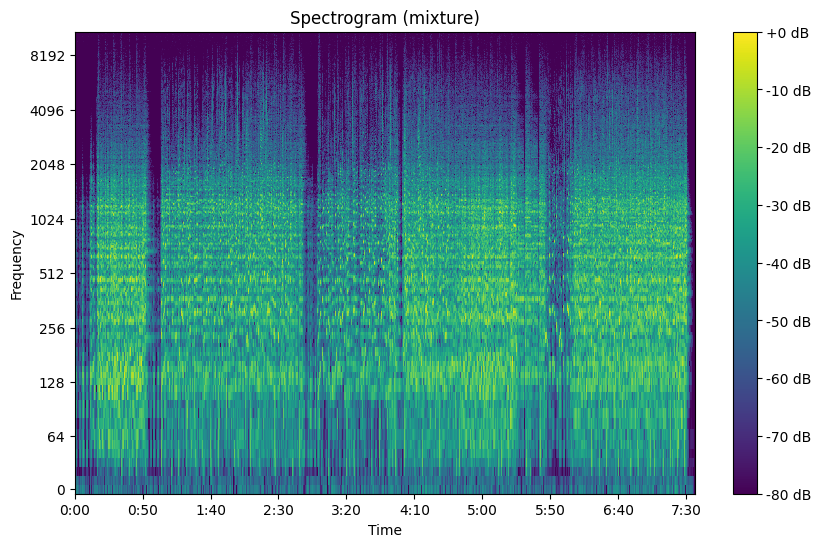

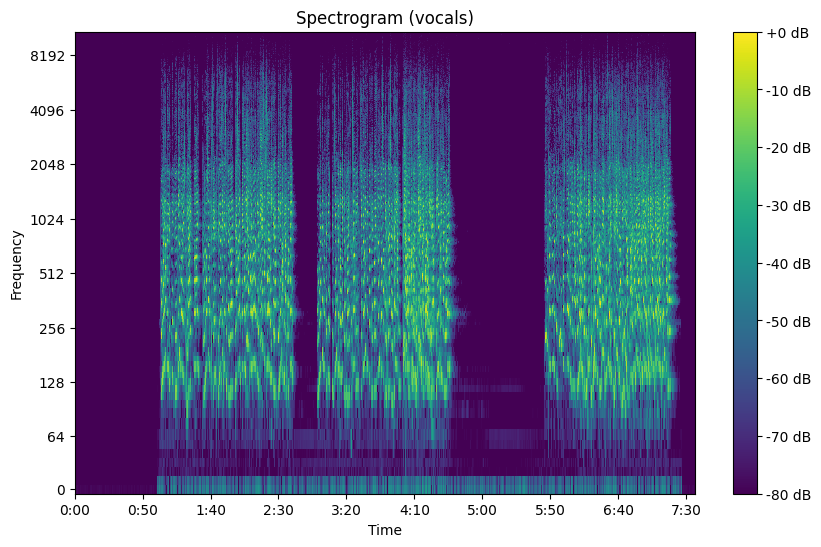

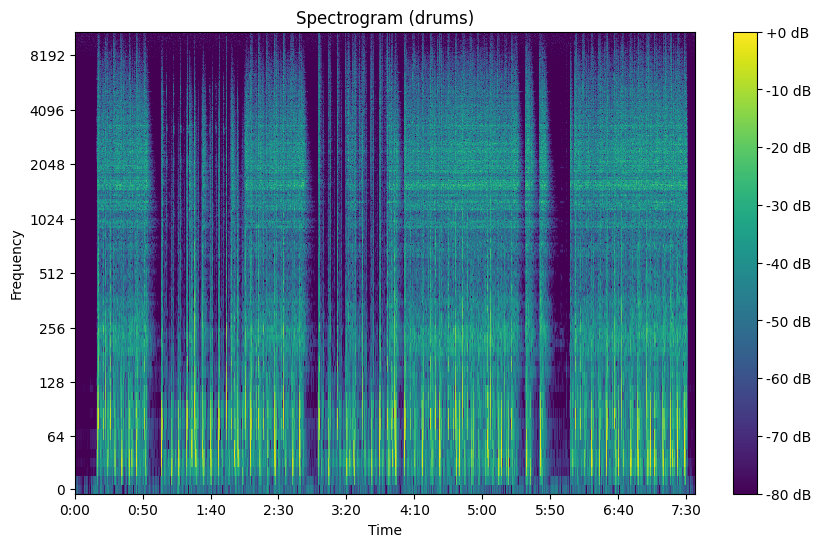

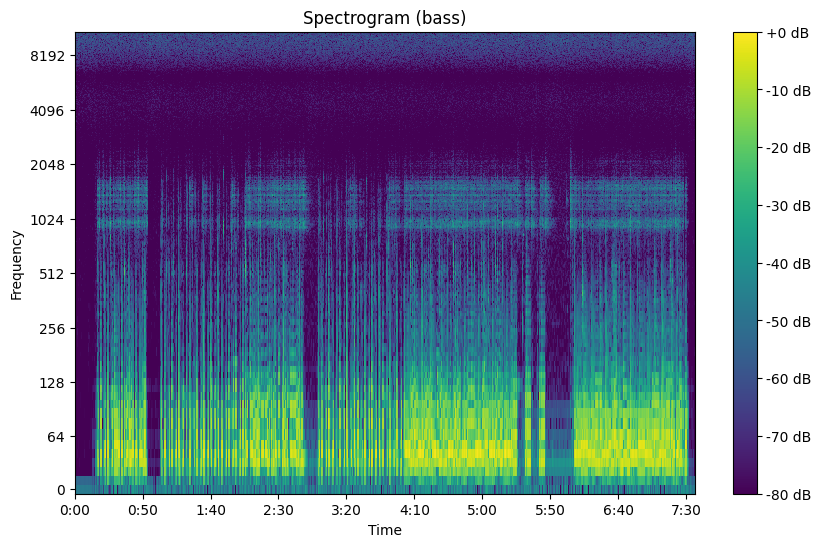

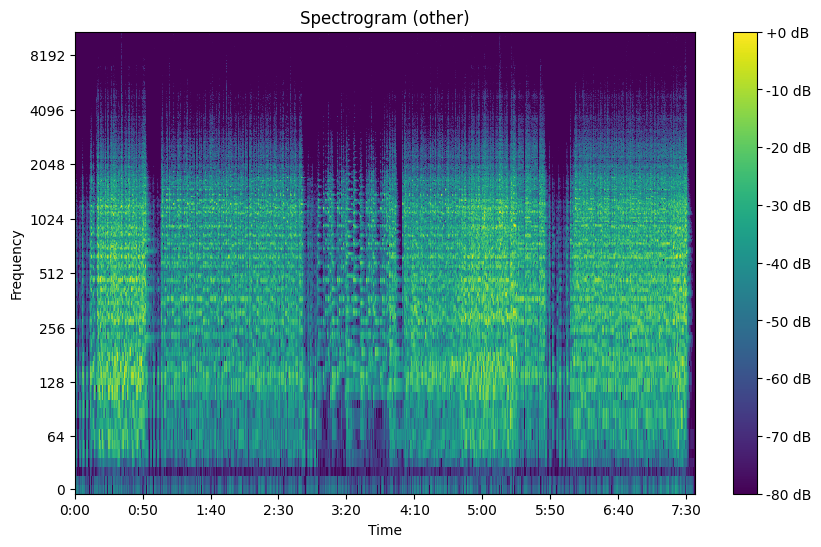

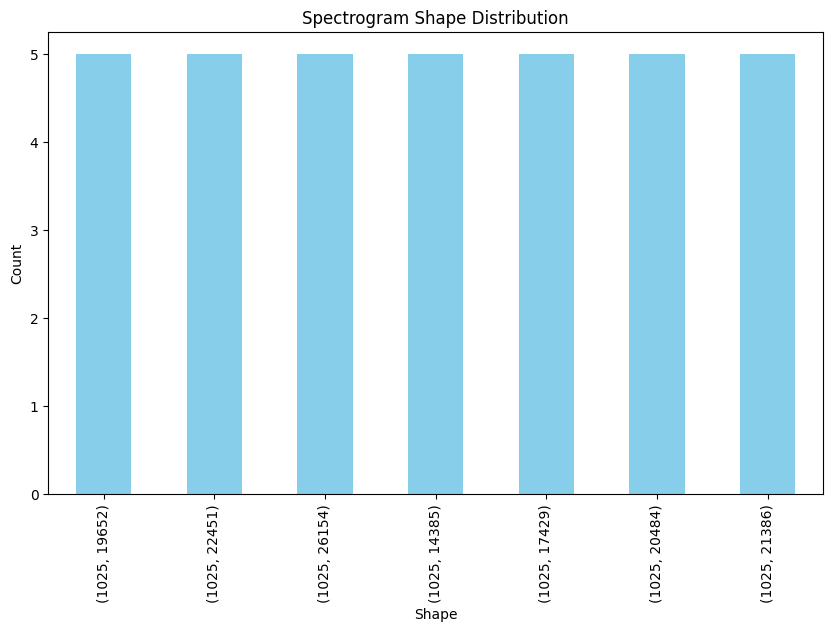

Analysis and visualization complete.


In [12]:
main()